In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [67]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv', usecols=lambda column: column != 'id')
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


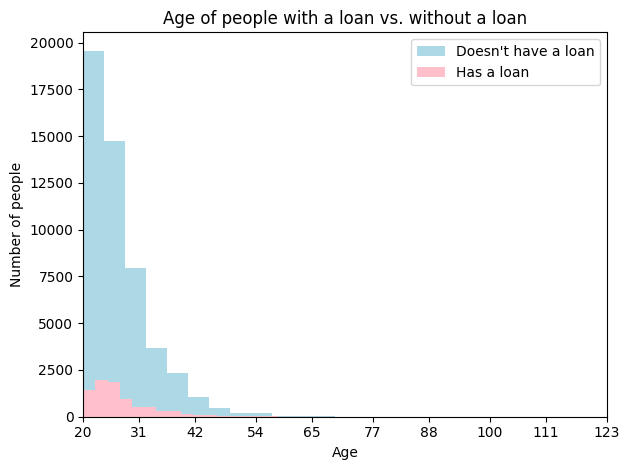

In [68]:
import matplotlib.pyplot as plt

loan_stat_0 = df_train[df_train['loan_status'] == 0]['person_age']
loan_stat_1 = df_train[df_train['loan_status'] == 1]['person_age']

fig, ax = plt.subplots(1,1,sharey=True,tight_layout=True)

ax.hist(loan_stat_0, bins=25, color = 'lightblue',label="Doesn't have a loan")
ax.hist(loan_stat_1, bins=25, color = 'pink', alpha=1,label='Has a loan')

# Set x-axis limits based on the automatic range
ax.set_xlim(left=min(min(loan_stat_0), min(loan_stat_1)), 
            right=max(max(loan_stat_0), max(loan_stat_1)))

ax.set_xlabel('Age')
ax.set_ylabel('Number of people')
ax.legend()

ax.set_title('Age of people with a loan vs. without a loan')
plt.xticks(ticks=np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=10).astype(int))  # Set 10 ticks

plt.show()

People aged between 23 - 28 got the most loans,
people aged between 20-23 are the most to not get loans

In [69]:
# usecols=lambda column: column != 'id'

test_save = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv') #ignore this, it will be used later
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv',usecols=lambda column: column != 'id')
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [70]:
#EDA_train

df_train.isna().sum() #No missingness

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [71]:
#Preprocessing train

#In case there is Multi-Collinearity: drop_first=True

df_train['person_home_ownership'].unique() #to check how many unique values there are
home_ownership_dummy = pd.get_dummies(df_train['person_home_ownership'],prefix='home_ownership',dtype=int,drop_first=True)
df_train = df_train.drop(columns='person_home_ownership').join(home_ownership_dummy)
df_train

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,37,35000,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,0,0,1
1,22,56000,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,0,1,0
2,29,28800,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,0,1,0
3,30,70000,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,0,0,1
4,22,60000,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0,0,0,0
58641,28,28800,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1,0,0,1
58642,23,44000,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1,0,0,1
58643,22,30000,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0,0,0,1


In [72]:
#In case there is Multi-Collinearity: drop_first=True

df_train['loan_intent'].unique() #to check how many unique values there are
loan_intent_dummy = pd.get_dummies(df_train['loan_intent'],prefix='loan_intent',dtype=int,drop_first=True)
df_train = df_train.drop(columns='loan_intent').join(loan_intent_dummy)
df_train

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,37,35000,0.0,B,6000,11.49,0.17,N,14,0,0,0,1,1,0,0,0,0
1,22,56000,6.0,C,4000,13.35,0.07,N,2,0,0,1,0,0,0,1,0,0
2,29,28800,8.0,A,6000,8.90,0.21,N,10,0,0,1,0,0,0,0,1,0
3,30,70000,14.0,B,12000,11.11,0.17,N,5,0,0,0,1,0,0,0,0,1
4,22,60000,2.0,A,6000,6.92,0.10,N,3,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,D,25000,15.95,0.21,Y,10,0,0,0,0,1,0,0,0,0
58641,28,28800,0.0,C,10000,12.73,0.35,N,8,1,0,0,1,0,0,1,0,0
58642,23,44000,7.0,D,6800,16.00,0.15,N,2,1,0,0,1,1,0,0,0,0
58643,22,30000,2.0,A,5000,8.90,0.17,N,3,0,0,0,1,1,0,0,0,0


In [73]:
#In case there is Multi-Collinearity: drop_first=True

df_train['loan_grade'].unique() #to check how many unique values there are
loan_grade_dummy = pd.get_dummies(df_train['loan_grade'],prefix='loan_grade',dtype=int,drop_first=True)
df_train = df_train.drop(columns='loan_grade').join(loan_grade_dummy)
df_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,37,35000,0.0,6000,11.49,0.17,N,14,0,0,...,0,0,0,0,1,0,0,0,0,0
1,22,56000,6.0,4000,13.35,0.07,N,2,0,0,...,0,1,0,0,0,1,0,0,0,0
2,29,28800,8.0,6000,8.90,0.21,N,10,0,0,...,0,0,1,0,0,0,0,0,0,0
3,30,70000,14.0,12000,11.11,0.17,N,5,0,0,...,0,0,0,1,1,0,0,0,0,0
4,22,60000,2.0,6000,6.92,0.10,N,3,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,Y,10,0,0,...,0,0,0,0,0,0,1,0,0,0
58641,28,28800,0.0,10000,12.73,0.35,N,8,1,0,...,0,1,0,0,0,1,0,0,0,0
58642,23,44000,7.0,6800,16.00,0.15,N,2,1,0,...,0,0,0,0,0,0,1,0,0,0
58643,22,30000,2.0,5000,8.90,0.17,N,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#In case there is Multi-Collinearity: drop_first=True

df_train['cb_person_default_on_file'].unique() #to check how many unique values there are
default_dummy = pd.get_dummies(df_train['cb_person_default_on_file'],prefix='default',dtype=int,drop_first=True)
df_train = df_train.drop(columns='cb_person_default_on_file').join(default_dummy)
df_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_Y
0,37,35000,0.0,6000,11.49,0.17,14,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,22,56000,6.0,4000,13.35,0.07,2,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,29,28800,8.0,6000,8.90,0.21,10,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,30,70000,14.0,12000,11.11,0.17,5,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,22,60000,2.0,6000,6.92,0.10,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,0,0,0,...,0,0,0,0,0,1,0,0,0,1
58641,28,28800,0.0,10000,12.73,0.35,8,1,0,0,...,1,0,0,0,1,0,0,0,0,0
58642,23,44000,7.0,6800,16.00,0.15,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
58643,22,30000,2.0,5000,8.90,0.17,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


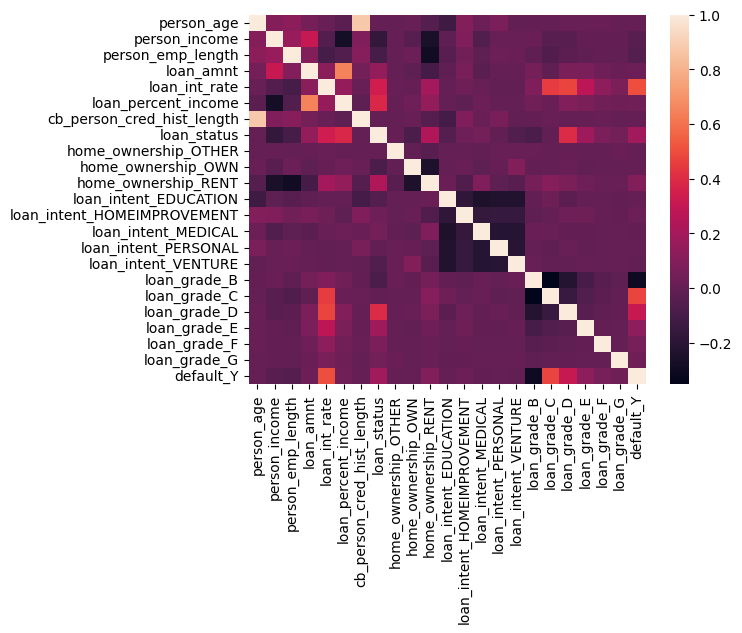

In [75]:
#Check for multi-collinearity

import seaborn as sns

corrMatrix = df_train.corr()
sns.heatmap(corrMatrix,annot=False)
plt.show()

In [76]:
#EDA_test

df_test.isna().sum() #No missingness

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [77]:
#Preprocessing test

df_test['person_home_ownership'].unique() #to check how many unique values there are
home_ownership_dummy = pd.get_dummies(df_test['person_home_ownership'],prefix='home_ownership',dtype=int,drop_first=True)
df_test = df_test.drop(columns='person_home_ownership').join(home_ownership_dummy)
df_test

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,23,69000,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,0,0,1
1,26,96000,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0,0,0
2,26,30000,5.0,VENTURE,E,4000,17.19,0.13,Y,2,0,0,1
3,33,50000,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0,0,1
4,26,102000,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4,0,0,0
39094,22,48000,6.0,EDUCATION,A,7000,6.03,0.15,N,3,0,0,0
39095,51,60000,0.0,PERSONAL,A,15000,7.51,0.25,N,25,0,0,0
39096,22,36000,4.0,PERSONAL,D,14000,15.62,0.39,Y,4,0,0,0


In [78]:
df_test['loan_intent'].unique() #to check how many unique values there are
loan_intent_dummy = pd.get_dummies(df_test['loan_intent'],prefix='loan_intent',dtype=int,drop_first=True)
df_test = df_test.drop(columns='loan_intent').join(loan_intent_dummy)
df_test

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,23,69000,3.0,F,25000,15.76,0.36,N,2,0,0,1,0,1,0,0,0
1,26,96000,6.0,C,10000,12.68,0.10,Y,4,0,0,0,0,0,0,1,0
2,26,30000,5.0,E,4000,17.19,0.13,Y,2,0,0,1,0,0,0,0,1
3,33,50000,4.0,A,7000,8.90,0.14,N,7,0,0,1,0,0,0,0,0
4,26,102000,8.0,D,15000,16.32,0.15,Y,4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,2.0,B,3000,10.37,0.10,N,4,0,0,0,0,0,0,0,0
39094,22,48000,6.0,A,7000,6.03,0.15,N,3,0,0,0,1,0,0,0,0
39095,51,60000,0.0,A,15000,7.51,0.25,N,25,0,0,0,0,0,0,1,0
39096,22,36000,4.0,D,14000,15.62,0.39,Y,4,0,0,0,0,0,0,1,0


In [79]:
df_test['loan_grade'].unique() #to check how many unique values there are
loan_grade_dummy = pd.get_dummies(df_test['loan_grade'],prefix='loan_grade',dtype=int,drop_first=True)
df_test = df_test.drop(columns='loan_grade').join(loan_grade_dummy)
df_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,23,69000,3.0,25000,15.76,0.36,N,2,0,0,...,1,0,0,0,0,0,0,0,1,0
1,26,96000,6.0,10000,12.68,0.10,Y,4,0,0,...,0,0,1,0,0,1,0,0,0,0
2,26,30000,5.0,4000,17.19,0.13,Y,2,0,0,...,0,0,0,1,0,0,0,1,0,0
3,33,50000,4.0,7000,8.90,0.14,N,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,102000,8.0,15000,16.32,0.15,Y,4,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,2.0,3000,10.37,0.10,N,4,0,0,...,0,0,0,0,1,0,0,0,0,0
39094,22,48000,6.0,7000,6.03,0.15,N,3,0,0,...,0,0,0,0,0,0,0,0,0,0
39095,51,60000,0.0,15000,7.51,0.25,N,25,0,0,...,0,0,1,0,0,0,0,0,0,0
39096,22,36000,4.0,14000,15.62,0.39,Y,4,0,0,...,0,0,1,0,0,0,1,0,0,0


In [80]:
df_test['cb_person_default_on_file'].unique() #to check how many unique values there are
default_dummy = pd.get_dummies(df_test['cb_person_default_on_file'],prefix='default',dtype=int,drop_first=True)
df_test = df_test.drop(columns='cb_person_default_on_file').join(default_dummy)
df_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_Y
0,23,69000,3.0,25000,15.76,0.36,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,26,96000,6.0,10000,12.68,0.10,4,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,26,30000,5.0,4000,17.19,0.13,2,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,33,50000,4.0,7000,8.90,0.14,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,26,102000,8.0,15000,16.32,0.15,4,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,2.0,3000,10.37,0.10,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39094,22,48000,6.0,7000,6.03,0.15,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39095,51,60000,0.0,15000,7.51,0.25,25,0,0,0,...,0,1,0,0,0,0,0,0,0,0
39096,22,36000,4.0,14000,15.62,0.39,4,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [81]:
#Fitting a  kNN model

from sklearn.model_selection import train_test_split

X = df_train.drop(columns='loan_status')
y = df_train['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.6, random_state=66)

In [82]:
#Training the models
#kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1,21)
scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_model,X_train,y_train).mean()
    scores.append(score)
    
scores = np.array(scores)
print(f'The best k values is {k_values[np.argmax(scores)]}')

The best k values is 17


In [83]:
knn_model = KNeighborsClassifier(n_neighbors = 17).fit(X_train,y_train)
y_val_pred_knn = knn_model.predict(X_val)

In [84]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(accuracy_knn)

0.8944496547020206


In [85]:
#Fitting a Logistic Regression

from sklearn.linear_model import LogisticRegression

c_values = [1e-4,1e-3,1e-2,1e-1,1]
scores = []

for c in c_values:
    log_model = LogisticRegression(max_iter=8000, C=c)
    score = cross_val_score(log_model,X_train,y_train).mean()
    scores.append(score)
    
scores = np.array(scores)
print(f'The best c value is {c_values[np.argmax(scores)]}')

The best c value is 1


In [86]:
log_model = LogisticRegression(max_iter=8000, C=1).fit(X_train,y_train)
y_val_pred_log = log_model.predict(X_val)

accuracy_log = accuracy_score(y_val,y_val_pred_log)
print(accuracy_log)

0.8851990792053883


In [87]:
#ROC_curve plus ROC_AUC_score  

y_val_pred_proba_knn = knn_model.predict_proba(X_val)[:,1]

y_val_pred_proba_log = log_model.predict_proba(X_val)[:,1]

In [88]:
def get_threshold(y_pred_proba):
    unique_probas = np.unique(y_pred_proba)
    unique_probas_sorted = unique_probas[::-1]
    thresholds = np.insert(unique_probas_sorted,0,1.1)
    thresholds = np.append(thresholds,0)
    return thresholds

In [89]:
knn_thresholds = get_threshold(y_val_pred_proba_knn)
log_thresholds = get_threshold(y_val_pred_proba_log)

In [90]:
def get_fpr(y_true, y_pred_proba, threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)

    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))

    fpr = fp / (fp+tn)
    return fpr

In [91]:
def get_tpr(y_true, y_pred_proba, threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)

    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    tpr = tp / (tp+fn)

    return tpr

In [92]:
fpr_knn = [get_fpr(y_val,y_val_pred_proba_knn,threshold) for threshold in knn_thresholds]
tpr_knn = [get_tpr(y_val,y_val_pred_proba_knn,threshold) for threshold in knn_thresholds]

In [93]:
fpr_log = [get_fpr(y_val,y_val_pred_proba_log,threshold) for threshold in log_thresholds]
tpr_log = [get_tpr(y_val,y_val_pred_proba_log,threshold) for threshold in log_thresholds]

In [94]:
from sklearn.metrics import roc_auc_score

knn_auc = roc_auc_score(y_val, y_val_pred_proba_knn)
log_auc = roc_auc_score(y_val, y_val_pred_proba_log)

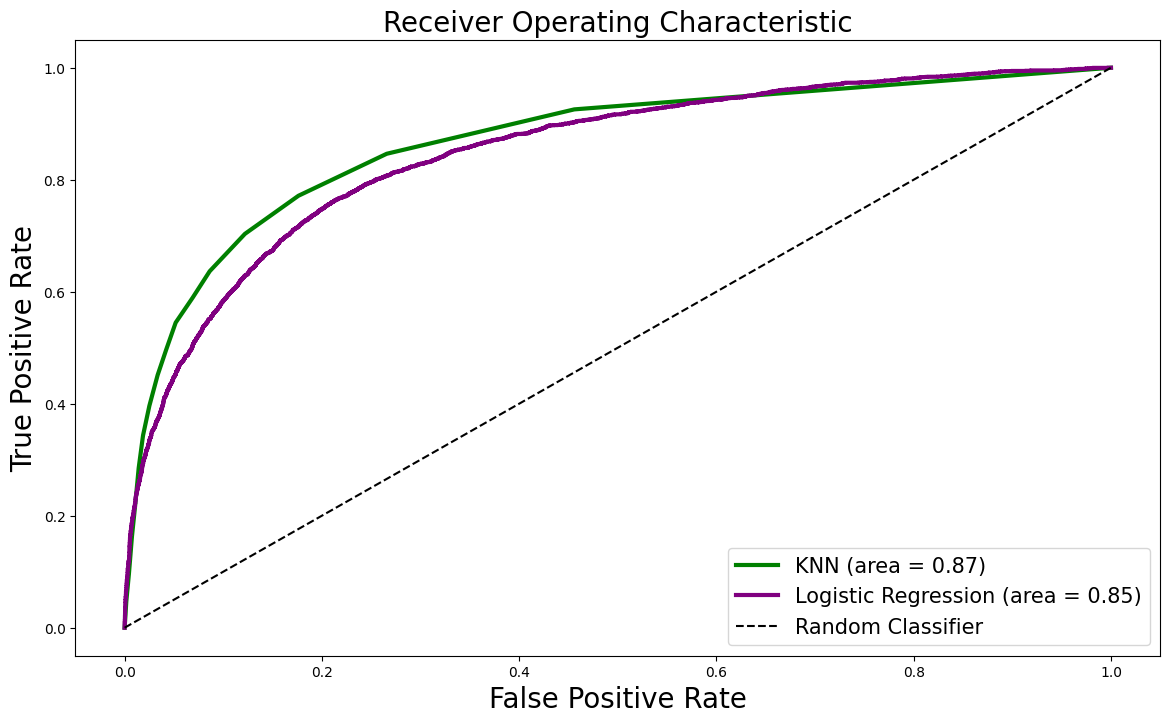

In [95]:
# Area under curve - Logistic Regression & kNN
fig, ax = plt.subplots(figsize = (14,8))

# Plot KNN Regression ROC Curve
ax.plot(fpr_knn,
        tpr_knn,
        label=f'KNN (area = {knn_auc:.2f})',
        color='g',
        lw=3)

# Plot Logistic Regression ROC Curve
ax.plot(fpr_log,
        tpr_log,
        label=f'Logistic Regression (area = {log_auc:.2f})',
        color = 'purple',
        lw=3)

# Plot diagonal line representing a random classifier
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

ax.set_xlabel('False Positive Rate', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=20)
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.legend(loc="lower right", fontsize=15)
plt.show()

In [96]:
print(y_val_pred_proba_knn)

[0.05882353 0.88235294 0.         ... 0.         0.         0.58823529]


In [97]:
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform

# Parameter distribution

catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

In [98]:
from sklearn.model_selection import RandomizedSearchCV

model_cb = CatBoostClassifier(silent=True)

random_search = RandomizedSearchCV(estimator=model_cb,
                  param_distributions = catboost_param_dist,
                  cv = 5,
                  random_state = 42,
                  verbose = 0,
                  n_jobs = -1)

random_search.fit(X_train, y_train)

random_search_cb_score = random_search.score(X_val, y_val)
print(f'The accuracy is:{random_search_cb_score}')

The accuracy is:0.9525534998721119


In [99]:
#Now we predict on X_test

loan_status = random_search.predict_proba(df_test)[:,1]

sample_submission = {
    'id' : test_save['id'],
    'loan_status' : loan_status
}

sample_submission = pd.DataFrame(sample_submission)

sample_submission.to_csv('sample_submission.csv', columns=['id', 'loan_status'], index=False)